[View in Colaboratory](https://colab.research.google.com/github/zzune/KerasBasic/blob/master/Chapter4_2_earlystopping.ipynb)

In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

Using TensorFlow backend.


In [0]:
# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [5]:
# 4. 모델 학습시키기
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
hist = model.fit(x_train, y_train, epochs=3000, batch_size=10, validation_data=(x_val, y_val),
                callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 229us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 159us/step - loss: 2.2071 - acc: 0.1671 - val_loss: 2.1907 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 148us/step - loss: 2.1728 - acc: 0.1729 - val_loss: 2.1629 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 156us/step - loss: 2.1439 - acc: 0.1786 - val_loss: 2.1370 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 154us/step - loss: 2.1175 - acc: 0.1900 - val_loss: 2.1139 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 146us/step - loss: 2.0938 - acc: 0.2029 - val_loss: 2.0926 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 151us/step - loss: 2.0717 - acc: 0.2086 - val_loss: 2.0724 - val_acc: 0.2067
Ep

Epoch 22/3000
700/700 [==============================] - 0s 153us/step - loss: 1.9009 - acc: 0.2386 - val_loss: 1.9286 - val_acc: 0.2033
Epoch 23/3000
700/700 [==============================] - 0s 171us/step - loss: 1.8951 - acc: 0.2357 - val_loss: 1.9232 - val_acc: 0.2100
Epoch 24/3000
700/700 [==============================] - 0s 170us/step - loss: 1.8891 - acc: 0.2329 - val_loss: 1.9207 - val_acc: 0.2100
Epoch 25/3000
700/700 [==============================] - 0s 176us/step - loss: 1.8827 - acc: 0.2357 - val_loss: 1.9178 - val_acc: 0.2167
Epoch 26/3000
700/700 [==============================] - 0s 163us/step - loss: 1.8766 - acc: 0.2300 - val_loss: 1.9105 - val_acc: 0.2167
Epoch 27/3000
700/700 [==============================] - 0s 193us/step - loss: 1.8712 - acc: 0.2357 - val_loss: 1.9099 - val_acc: 0.2167
Epoch 28/3000
700/700 [==============================] - 0s 163us/step - loss: 1.8659 - acc: 0.2400 - val_loss: 1.9094 - val_acc: 0.2000
Epoch 29/3000
700/700 [==================

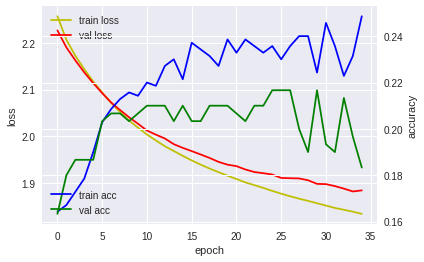

In [6]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [7]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 0s 28us/step

loss : 1.9108153785705566
accuracy : 0.199
